In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# Part 1.

In [2]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


Tasks, Part 1
Find the linear regression equation for mileage vs price.
Chart the original data and the equation on the chart.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [5]:
df1 = df.loc[:,['Price','Mileage']]
df1

,Price,Mileage
0,17314.103129,8221
1,17542.036083,9135
2,16218.847862,13196
3,16336.913140,16342
4,16339.170324,19832
...,...,...
799,16507.070267,16229
800,16175.957604,19095
801,15731.132897,20484
802,15118.893228,25979


In [14]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [15]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [17]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [19]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


<AxesSubplot:xlabel='Mileage'>

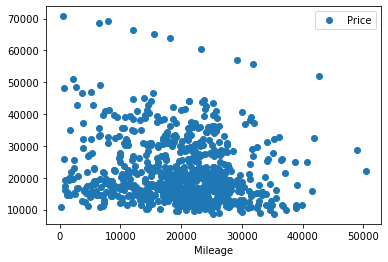

In [3]:
df.plot(x= 'Mileage',y = 'Price', style = 'o')

In [6]:
df1.describe()

,Price,Mileage
count,804.000000,804.000000
mean,21343.143767,19831.934080
std,9884.852801,8196.319707
min,8638.930895,266.000000
25%,14273.073870,14623.500000
50%,18024.995019,20913.500000
75%,26717.316636,25213.000000
max,70755.466717,50387.000000


<AxesSubplot:xlabel='Price'>

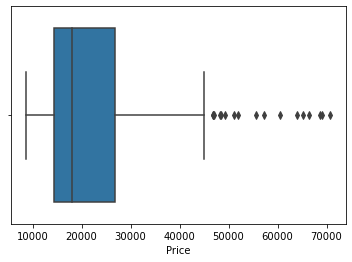

In [15]:
sns.boxplot(x = df1["Price"])

In [ ]:
There we can find outliers. Let us explore the outliers.

In [16]:
def outlier_presence(df_OUT):
  for i in df_OUT.keys():
    Q1 = df_OUT[i].quantile(0.25)
    Q3 = df_OUT[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df_OUT[(df_OUT[i]<lower_limit)|(df_OUT[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df1)

Interquartile Range of Price is 12444.242765331575
Lower Limit  -4393.290277667038
Upper Limit  45383.68078365926
Outlier is Presented In Price


Interquartile Range of Mileage is 10589.5
Lower Limit  -1260.75
Upper Limit  41097.25
Outlier is Presented In Mileage




In [ ]:
Let us cap the outliers. 

In [17]:
def Capping_Outlier(df_CO):
  for i in df_CO.keys():
    Q1 = df_CO[i].quantile(0.25)
    Q3 = df_CO[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df_CO[i] = np.where(df_CO[i]<lower_limit, lower_limit, np.where(df_CO[i]>upper_limit, upper_limit, df_CO[i])) # Here We Replace The All outliers with whiskers(lower_limit and upper_limit)
    print("Outliers in " + i + " Are Capped Using Capping Method")
  return df_CO
df1 = Capping_Outlier(df1)

Outliers in Price Are Capped Using Capping Method
Outliers in Mileage Are Capped Using Capping Method


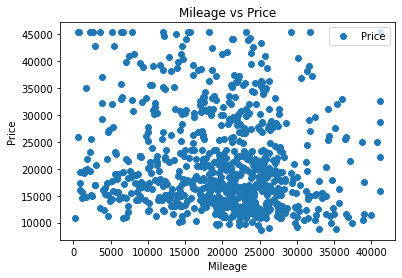

In [18]:
df1.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Find the coorelation between the Price and Mileage

In [19]:
df1.corr()

,Price,Mileage
Price,1.000000,-0.138997
Mileage,-0.138997,1.000000


Still Coorelation not upto the level. so, we can say it will not give correct prediction. Though it is we will try to find the linear equation.

In [20]:
X = df1.loc[:,['Mileage']].values
y = df1.loc[:,'Price'].values
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

Try with Standard Scalling

In [31]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
lr.coef_

array([-1412.4340523])

In [34]:
lr.intercept_

21248.69550360313

In [35]:
y_pred = lr.predict(X_test)

In [36]:
New_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_df

,Actual,Predicted
0,25098.629057,22975.259506
1,16106.827221,21300.421383
2,12333.603993,20872.984122
3,17978.356998,22803.008669
4,11873.533995,19717.379488
...,...,...
156,18040.144006,22685.871012
157,11671.858127,20190.714862
158,27284.751328,22219.092511
159,14418.165291,21237.865266


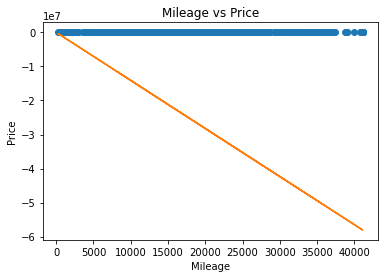

In [37]:
y_pred = lr.predict(X) 
plt.plot(X, y, 'o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.plot(X, y_pred)

Predection is as expected, let us conclude with proper metric(R2)

In [39]:
from sklearn import metrics
y_pred = lr.predict(X_test) 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -0.011072739351832839


We have got the R2 is not even in the margin. So i will recommend this developed model for the feature predections.

# Part 2

In [41]:
df2 = df [['Price','Cylinder', 'Liter','Doors','Cruise','Sound','Leather']]
df2

,Price,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,6,3.1,4,1,1,1
1,17542.036083,6,3.1,4,1,1,0
2,16218.847862,6,3.1,4,1,1,0
3,16336.913140,6,3.1,4,1,0,0
4,16339.170324,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16507.070267,6,3.0,4,1,0,0
800,16175.957604,6,3.0,4,1,1,0
801,15731.132897,6,3.0,4,1,1,0
802,15118.893228,6,3.0,4,1,1,0


In [42]:
df2.shape

(804, 7)

Exploratory Data Analysis

In [43]:
df2.describe()

,Price,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [45]:
df2[['Price','Cylinder']].corr()

,Price,Cylinder
Price,1.000000,0.569086
Cylinder,0.569086,1.000000


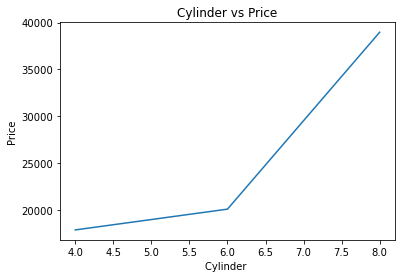

In [46]:
df2.groupby('Cylinder')['Price'].mean().plot()
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder ')
plt.ylabel('Price')
plt.show()

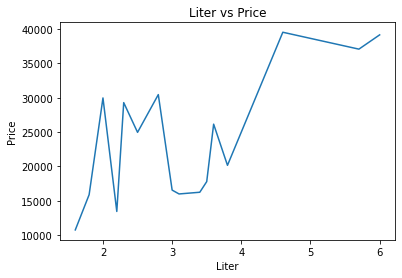

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [48]:
df2.groupby('Liter')['Price'].mean().plot()
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

df2[['Liter', 'Price']].corr()

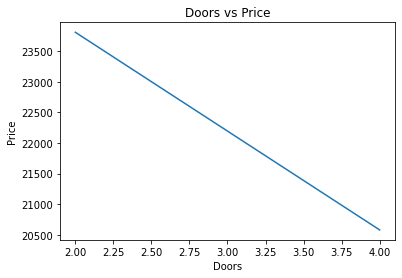

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [49]:
df2.groupby('Doors')['Price'].mean().plot()
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

df2[['Doors', 'Price']].corr()

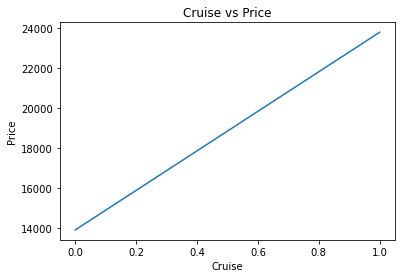

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [50]:
df2.groupby('Cruise')['Price'].mean().plot()
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

df2[['Cruise', 'Price']].corr()

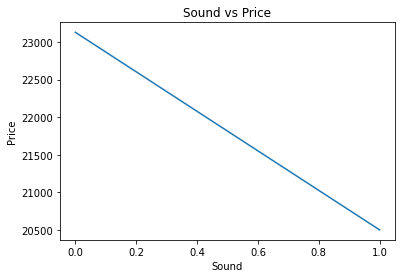

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [51]:
df2.groupby('Sound')['Price'].mean().plot()
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

df2[['Sound', 'Price']].corr()

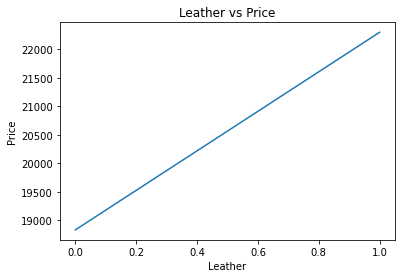

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [52]:
df2.groupby('Leather')['Price'].mean().plot()
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

df2[['Leather', 'Price']].corr()

We Can Find That There Is Good Linear Relation Between (Mileage, Cylinder, Liter, Doors, Cruise, Sound, Leather) And Price, For Categorical Variable Correlation Values Doesn't Have Any Sense Here, So We Can Develop Linear Regression Model.

In [53]:
X = df2.loc[:, ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values 
y = df2.loc[:, 'Price'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [ ]:
Scale the data

In [54]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled) 
y_pred

array([21267.15256603, 17276.36169075, 10784.39855882, 23896.37924655,
       10784.39855882, 33781.79571765, 34627.26472746, 21387.22961587,
       26976.14875388, 33977.56179954, 33977.56179954, 14925.5791222 ,
       20495.35325406, 11977.45901754, 14925.5791222 , 18283.79274149,
       31523.82785309, 15080.89589192, 18551.06922134, 18283.79274149,
       14235.42688211, 24718.18088931, 14832.76441821, 15080.89589192,
       27115.37080986, 18283.79274149, 18237.3853895 , 18237.3853895 ,
       33781.79571765, 21480.04431986, 21267.15256603, 20495.35325406,
       24810.9955933 , 36235.52966411, 23525.12043059, 20495.35325406,
       26976.14875388, 18551.06922134, 11977.45901754, 18469.42214947,
       21387.22961587, 17936.20129259, 18376.60744548, 15080.89589192,
       17183.54698676, 18237.3853895 , 13887.8354332 , 25089.43970527,
       23896.37924655, 21267.15256603, 18551.06922134, 18283.79274149,
       25182.25440926, 18283.79274149, 18283.79274149, 17090.73228277,
      

In [56]:
New_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_df

,Actual,Predicted
0,25098.629057,21267.152566
1,16106.827221,17276.361691
2,12333.603993,10784.398559
3,17978.356998,23896.379247
4,11873.533995,10784.398559
...,...,...
156,18040.144006,30079.585628
157,11671.858127,18283.792741
158,27284.751328,18376.607445
159,14418.165291,11977.459018


In [57]:
df_coff = pd.DataFrame(regressor.coef_ , ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns= ['Cofficient'])
df_coff

,Cofficient
Cylinder,4981.073720
Liter,-519.758020
Doors,-1321.525959
Cruise,2679.344249
Sound,-1045.258348
Leather,1538.694229


In [58]:
print(regressor.intercept_)

21505.232377034965


In [59]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.43549065131817866


R2 Score is positive and may recommend the model. let us identify the best parameter(s).

In [60]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],sfs.get_support())))

[('Cylinder', True), ('Liter', False), ('Doors', False), ('Cruise', True), ('Sound', False), ('Leather', False)]


we can identify here best parameters.

# Task 3

In [67]:
df3 = df[['Price','Make','Model','Trim']]
df3

,Price,Make,Model,Trim
0,17314.103129,Buick,Century,Sedan 4D
1,17542.036083,Buick,Century,Sedan 4D
2,16218.847862,Buick,Century,Sedan 4D
3,16336.913140,Buick,Century,Sedan 4D
4,16339.170324,Buick,Century,Sedan 4D
...,...,...,...,...
799,16507.070267,Saturn,L Series,L300 Sedan 4D
800,16175.957604,Saturn,L Series,L300 Sedan 4D
801,15731.132897,Saturn,L Series,L300 Sedan 4D
802,15118.893228,Saturn,L Series,L300 Sedan 4D


In [68]:
df3 = pd.get_dummies(df3, columns=['Make','Model','Trim'])
df3

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
800,16175.957604,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,15731.132897,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,15118.893228,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X = df3.iloc[:, 1:].values 
y = df3.loc[:, 'Price'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [70]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test) 
y_pred

array([22368., 16096., 12704., 16704., 12704., 37568., 64096., 12960.,
       21920., 36160., 36160., 30432., 29056., 13568., 30432., 12992.,
       42912., 13824., 16832., 12192., 12704., 17280., 12704., 13152.,
       20064., 15072., 30336., 30336., 42912., 35616., 18080., 29056.,
       19264., 36160., 16384., 30336., 18080., 17888., 14528., 15520.,
       13824., 14272., 25696., 12448., 30432., 27328., 14272., 16704.,
       16704., 18080., 17888., 12192., 31104., 12992., 12192., 12704.,
       18080., 12704., 12704., 34080., 42912., 20544., 11328., 38112.,
       42912., 19264., 22368., 29056., 16832., 16096., 11584., 30432.,
       32064., 20544., 11584., 17248., 29056., 15872., 22848., 12448.,
       11584., 11168., 20384., 17152., 11040., 21536., 16096., 34080.,
       12960., 17248., 16256., 11008., 11040., 21536., 29376., 20544.,
       32928., 14272., 15872., 14272., 16832., 22368., 31104., 22848.,
       13568., 13504., 22368., 16384., 20384., 16320., 25568., 16384.,
      

In [71]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred

,Actual,Predicted
0,25098.629057,22368.0
1,16106.827221,16096.0
2,12333.603993,12704.0
3,17978.356998,16704.0
4,11873.533995,12704.0
...,...,...
156,18040.144006,17024.0
157,11671.858127,12192.0
158,27284.751328,25696.0
159,14418.165291,14528.0


In [72]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9522147328433099


The R2 is as expected and it can be recommended.